# Alpaca Team
<img src="images4notebook/genAlpaca.webp" alt="Alpaca che lavora su un progetto di machine learning" width="500"/>

This work was done by 
- Ernesto Natuzzi
- Flavia Nicotri
- Luca Pagano
- Giuseppe Vitello

# Data exploration

In [58]:
import numpy as np

data = np.load('Dataset/training_set.npz')
X = data['images']
y = data['labels']
# Let's see the shape
X.shape, y.shape

((13759, 96, 96, 3), (13759, 1))

In [36]:
# To better understand images labels let's introduce a dictionary
num_to_cell = {0: "Basophil", 1: "Eosinophil", 2: "Erythroblast", 3: "Immature granulocytes", 4: "Lymphocyte", 5: "Monocyte", 6: "Neutrophil", 7: "Platelet"}

## Filtering the dataset
During the dataset exploration, we noticed some "interesting" photos...
<div style="display: flex; justify-content: space-between;">
    <img src="images4notebook/shrek.png" alt="Image 1" width="45%" />
    <img src="images4notebook/rickroll.png" alt="Image 2" width="45%" />
</div>

Specifically, the non-relevant images starts in the dataset from the image "11959". So we removed them from obvious reasons.

In [65]:
# Excluding the last 11959 images from the dataset
X = X[0:11959]
y = y[0:11959]
# Saving the new dataset
np.savez('Dataset/training_set_cleaned.npz', images=X, labels=y) 
X.shape, y.shape

((11959, 96, 96, 3), (11959, 1))

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from tensorflow import keras

Let's check if all images are of the same size

In [67]:
# Some information about the dataset
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1:])
print("Unique labels:", np.unique(y))

Shape of X: (11959, 96, 96, 3)
Shape of y: (11959, 1)
Number of samples: 11959
Number of features: (96, 96, 3)
Unique labels: [0 1 2 3 4 5 6 7]


In [70]:
%matplotlib inline
num_samples = np.zeros(7)

for i in range(7):
  #conto il numero di immagini con label i nel dataset
  num_samples[i] = np.sum(y == i)

print(num_samples)
#plot the percentage in the total for each class
plt.bar(range(7), num_samples/np.sum(num_samples))
plt.xlabel('Class')
plt.ylabel('Percentage')

[ 852. 2181. 1085. 2026.  849.  993. 2330.]


Text(33.972222222222214, 0.5, 'Percentage')

In [41]:
X_train, X_test, y_train, y_test = train_test_split (
      X, 
      y,
      test_size=0.1,
      random_state=42, 
      stratify=y
)

# Split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train,
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9906, 96, 96, 3)
y_train shape: (9906, 1)
X_val shape: (2477, 96, 96, 3)
y_val shape: (2477, 1)
X_test shape: (1376, 96, 96, 3)
y_test shape: (1376, 1)


## Dividing the dataset
Now let's split the dataset into three portion and use the flag stratify to equally distribute the dataset into the various partition.

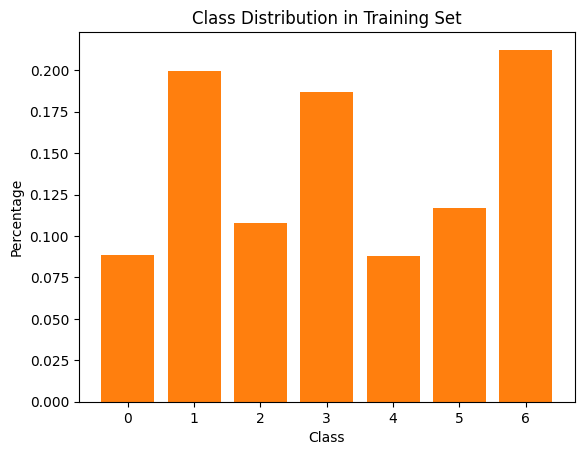

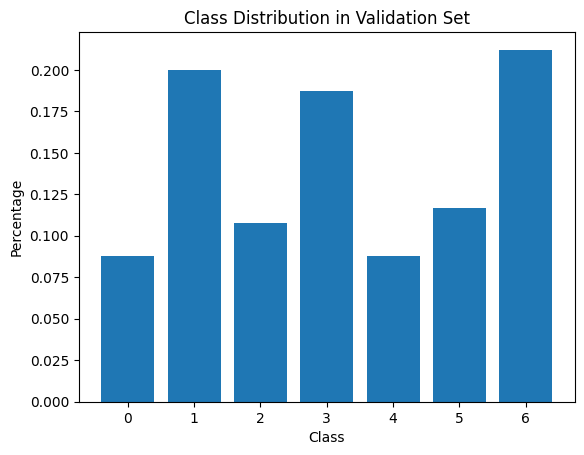

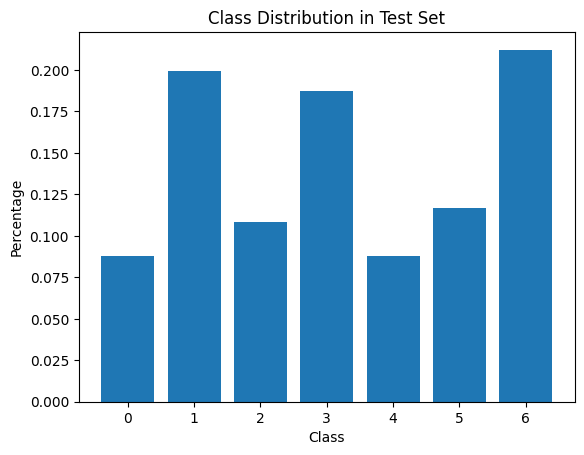

In [42]:
%matplotlib inline
def plot_class_distribution(y, title):
  num_samples = np.zeros(7)
  for i in range(7):
    num_samples[i] = np.sum(y == i)
  plt.bar(range(7), num_samples / np.sum(num_samples))
  plt.xlabel('Class')
  plt.ylabel('Percentage')
  plt.title(title)
  plt.show()

plot_class_distribution(y_train, 'Class Distribution in Training Set')
plot_class_distribution(y_val, 'Class Distribution in Validation Set')
plot_class_distribution(y_test, 'Class Distribution in Test Set')